In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

In [2]:
# 2. Data Loading
# Try to load the cleaned dataset first;
try:
    df = pd.read_csv('../data/cleaned_data.csv')
    print("✅ Dataset loaded successfully!")
    print(df.head())
except FileNotFoundError:
    print("❌ Error: File not found at '../data/cleaned_data.csv'")

✅ Dataset loaded successfully!
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  Month  Year  Day_of_Week  \
0         3              20            60     11  2023            4   
1         2             112           224      2  2023            0   
2         1             929           929      1  2023            4   
3         1             293           293      5  2023            6   
4         2              40            80      5  2023            5   

   Gender_Encoded  Category_Encoded  
0               1                 0  
1              

In [3]:
# 3. Data Preprocessing
# Encode Gender (e.g., Male: 1, Female: 0)
le_gender = LabelEncoder()
df['Gender_Code'] = le_gender.fit_transform(df['Gender'])

# Process Date column if it exists to extract Month
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month

# Define Features (X) and Target (y)
# Selecting the most relevant features for classification
features = ['Age', 'Gender_Code', 'Total Amount', 'Price per Unit', 'Quantity']
if 'Month' in df.columns:
    features.append('Month')

X = df[features]
y = df['Product Category']

# Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining Set Size: {X_train.shape}")
print(f"Testing Set Size: {X_test.shape}")


Training Set Size: (800, 6)
Testing Set Size: (200, 6)


In [4]:
# 4. Model Training (Random Forest)
print("\nTraining the model...")
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
print("✅ Model training completed.")


Training the model...
✅ Model training completed.



🎯 Model Accuracy: 84.50%

📊 Classification Report:
              precision    recall  f1-score   support

      Beauty       0.82      0.90      0.86        73
    Clothing       0.77      0.68      0.73        60
 Electronics       0.93      0.93      0.93        67

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



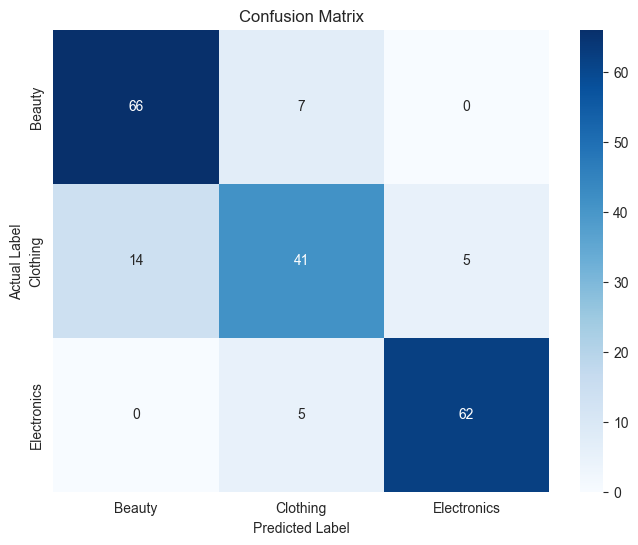

In [5]:
# 5. Evaluation
y_pred = rf_model.predict(X_test)

# Calculate Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Model Accuracy: {acc*100:.2f}%")

# Detailed Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

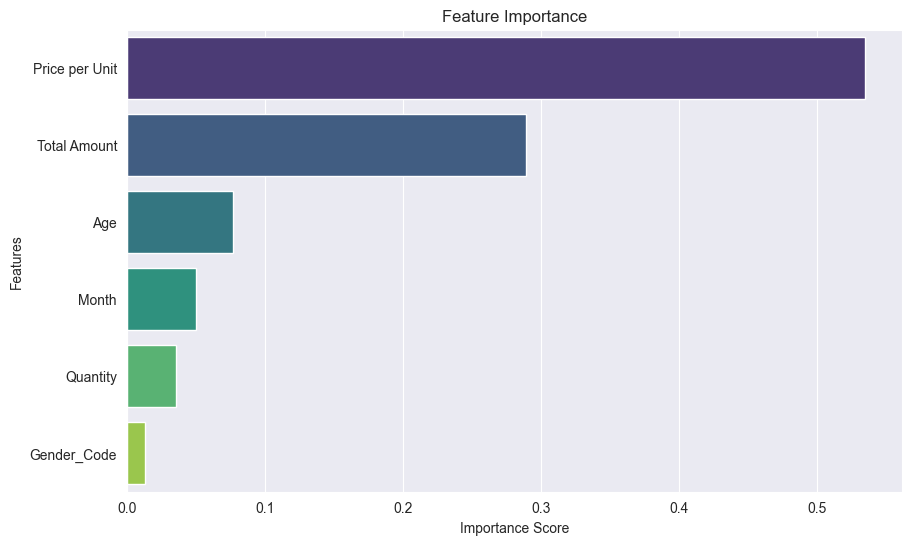

In [6]:
# 6. Feature Importance Visualization
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [7]:
# 7. MODEL EXPORT
import os
import joblib

# 1. Define the target directory
# Windows paths need 'r' at the start or double backslashes
target_dir = os.path.join('..', 'models')
# 2. Create the directory if it doesn't exist
# This prevents "FileNotFoundError" if the folder is missing
if not os.path.exists(target_dir):
    os.makedirs(target_dir)
    print(f"📁 Created directory: {target_dir}")

# 3. Define full file paths
model_path = os.path.join(target_dir, 'classification_model.pkl')
encoder_path = os.path.join(target_dir, 'gender_encoder.pkl')

# 4. Save the model and encoder
joblib.dump(rf_model, model_path)
print(f"\n💾 Model saved successfully to:\n   -> {model_path}")

joblib.dump(le_gender, encoder_path)
print(f"💾 Gender encoder saved successfully to:\n   -> {encoder_path}")


💾 Model saved successfully to:
   -> ..\models\classification_model.pkl
💾 Gender encoder saved successfully to:
   -> ..\models\gender_encoder.pkl
